# **Data Preprocessing Project**

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [10]:
# Load the dataset and rename columns for clarity
data = pd.read_csv('data/heart_disease.csv')
data.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease']

**Drop Duplicates, Handle Missing Values, and Remove Outliers**

In [11]:
# Drop the 'disease' column as it's the target variable for prediction
data = data.drop(['disease'], axis=1)

# Print the shape of the dataset to understand its dimensions
print(f'Number of instances = {{data.shape[0]}}')  # Number of rows
print(f'Number of attributes = {{data.shape[1]}}')  # Number of columns
print(data.head())  # Display the first few rows for a quick overview

Number of instances = {data.shape[0]}
Number of attributes = {data.shape[1]}
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
1  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
2  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4  56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   

   slope ca thal  
0    2.0  3    3  
1    2.0  2    7  
2    3.0  0    3  
3    1.0  0    3  
4    1.0  0    3  


In [12]:
# **Modularization: Created a function for duplicate removal**
def remove_duplicates(df):
    dups = df.duplicated()
    print(f'Number of duplicate rows = {{dups.sum()}}')  # Count duplicates
    df_cleaned = df.drop_duplicates()
    print(f'Number of instances after dropping duplicates = {{df_cleaned.shape[0]}}')  # New row count
    return df_cleaned

In [13]:
# Remove duplicates from the dataset
data2 = remove_duplicates(data)

# Replace '?' with NaN to handle missing values properly
data3 = data2.replace('?', np.nan)

Number of duplicate rows = {dups.sum()}
Number of instances after dropping duplicates = {df_cleaned.shape[0]}


In [14]:
# **Handle missing values**
def handle_missing_values(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    print('Replace missing values with median')
    for col in df.columns:
        df[col] = df[col].fillna(df[col].median())  # No inplace, reassign the column directly
    return df

# Handle missing values in the dataset
data3 = handle_missing_values(data3)

Replace missing values with median


In [15]:
# **Visualize missing values**
def visualize_missing_values(df):
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        missing_values.plot(kind='bar', figsize=(10, 5))  # Plot only columns with missing values
        plt.title('Missing Values Count')  # Title for the plot
        plt.xlabel('Features')  # X-axis label
        plt.ylabel('Count')  # Y-axis label
        plt.show()  # Display the plot
    else:
        print("No missing values to visualize.")

# Visualize missing values after handling missing data
visualize_missing_values(data3)

No missing values to visualize.


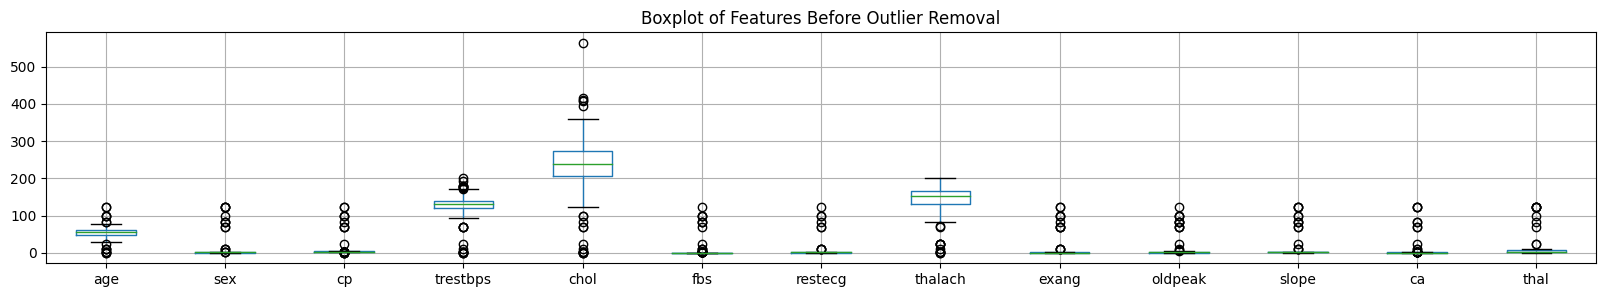

In [16]:
# **Visualizing potential outliers using boxplots**
data3.boxplot(figsize=(20, 3))  # Initial boxplot for visual inspection
plt.title('Boxplot of Features Before Outlier Removal')
plt.show()  # Display the boxplot

In [17]:
# **Remove outliers**
def remove_outliers(df):
    Z = (df - df.mean()) / df.std()  # Z-score normalization
    print(f'Number of rows before removing outliers = {{Z.shape[0]}}')  # Initial row count
    Z2 = df.loc[((Z > -3).sum(axis=1) == len(df.columns)) & ((Z <= 3).sum(axis=1) == len(df.columns)), :]
    print(f'Number of rows after removing outliers = {{Z2.shape[0]}}')  # Count after outlier removal
    return Z2

# Remove outliers from the dataset
data3 = remove_outliers(data3)

Number of rows before removing outliers = {Z.shape[0]}
Number of rows after removing outliers = {Z2.shape[0]}


**One hot Encoding and Feature Scaling on the Dataset**

In [27]:
# Using Label Encoding for binary columns and One-Hot Encoding for multiclass columns
X = data.copy()

def encode_categorical(df):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    # Label encode binary categorical columns
    df['sex'] = le.fit_transform(df['sex'])
    df['fbs'] = le.fit_transform(df['fbs'])
    df['exang'] = le.fit_transform(df['exang'])

    # One-Hot encode multiclass columns
    df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])
    return df

X_encoded = encode_categorical(X)

In [19]:
# **Feature scaling**
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data3_scaled = pd.DataFrame(scaler.fit_transform(data3), columns=data3.columns)

In [20]:
# **Visualize cleaned data**
def visualize_data(df):
    df.boxplot(figsize=(20, 3))  # Size of the plot
    plt.title('Boxplot of Features After Cleaning and Scaling')
    plt.show()

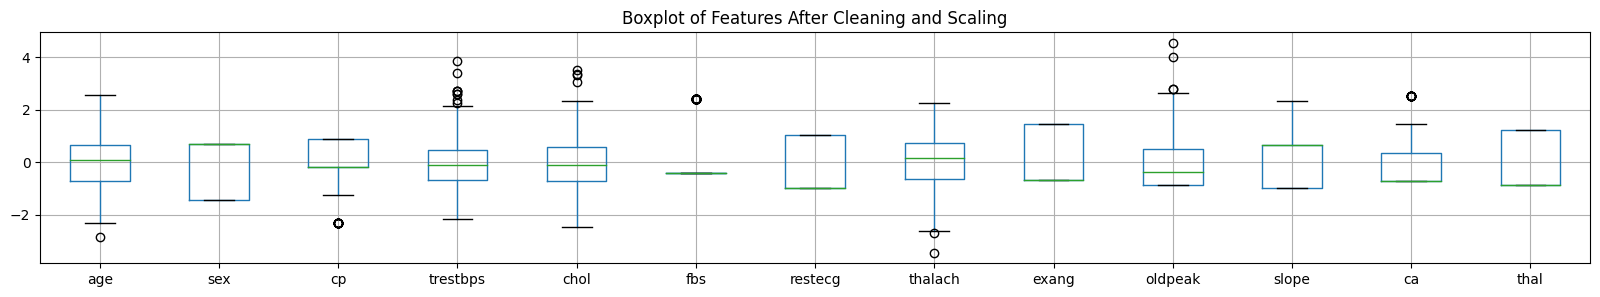

In [21]:
# Visualize the cleaned dataset
visualize_data(data3_scaled)

**Split the Dataset 80% train, 20% test**

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
min_max_scaler = MinMaxScaler()
data3_minmax = pd.DataFrame(min_max_scaler.fit_transform(data3), columns=data3.columns)

# Display the scaled data
print("Data after Min-Max Scaling:\n", data3_minmax.head())


Data after Min-Max Scaling:
         age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.791667  1.0  1.000000  0.622642  0.549828  0.0      1.0  0.282443    1.0   
1  0.791667  1.0  1.000000  0.245283  0.353952  0.0      1.0  0.442748    1.0   
2  0.166667  1.0  0.666667  0.339623  0.426117  0.0      0.0  0.885496    0.0   
3  0.250000  0.0  0.333333  0.339623  0.268041  0.0      1.0  0.770992    0.0   
4  0.562500  1.0  0.333333  0.245283  0.378007  0.0      0.0  0.816794    0.0   

    oldpeak  slope        ca  thal  
0  0.241935    0.5  1.000000   0.0  
1  0.419355    0.5  0.666667   1.0  
2  0.564516    1.0  0.000000   0.0  
3  0.225806    0.0  0.000000   0.0  
4  0.129032    0.0  0.000000   0.0  


In [33]:
# **Split dataset**
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80-20 split)
train_data, test_data = train_test_split(data3_scaled, test_size=0.2, random_state=42)

# **Calculate mean and standard deviation for both sets**
train_mean = train_data.mean()
train_std = train_data.std()

test_mean = test_data.mean()
test_std = test_data.std()

In [23]:
# Display the mean and standard deviation for training and test sets
print(f'Train Mean:\n{train_mean}')
print(f'Train Std:\n{train_std}')
print(f'Test Mean:\n{test_mean}')
print(f'Test Std:\n{test_std}')

Train Mean:
age         0.016277
sex        -0.004375
cp         -0.008290
trestbps   -0.002095
chol       -0.005001
fbs         0.067379
restecg    -0.072675
thalach     0.012813
exang      -0.016388
oldpeak    -0.011330
slope       0.019730
ca          0.007312
thal        0.029583
dtype: float64
Train Std:
age         0.995279
sex         1.003849
cp          0.990482
trestbps    0.985334
chol        1.003642
fbs         1.064952
restecg     0.996397
thalach     0.970114
exang       0.995734
oldpeak     0.986962
slope       1.018232
ca          1.010547
thal        1.006806
dtype: float64
Test Mean:
age        -0.064822
sex         0.017424
cp          0.033016
trestbps    0.008343
chol        0.019916
fbs        -0.268335
restecg     0.289427
thalach    -0.051028
exang       0.065264
oldpeak     0.045122
slope      -0.078574
ca         -0.029118
thal       -0.117814
dtype: float64
Test Std:
age         1.033625
sex         1.002100
cp          1.053937
trestbps    1.073842
chol    

**Comparing the training and test values**

In [34]:
# Compare the difference between train and test means
mean_diff = abs(train_mean - test_mean)
std_diff = abs(train_std - test_std)

In [25]:
print(f'Mean Differences Between Train and Test:\n{mean_diff}\n')
print(f'Standard Deviation Differences Between Train and Test:\n{std_diff}\n')

Mean Differences Between Train and Test:
age         0.081099
sex         0.021800
cp          0.041306
trestbps    0.010438
chol        0.024916
fbs         0.335714
restecg     0.362102
thalach     0.063841
exang       0.081652
oldpeak     0.056452
slope       0.098304
ca          0.036430
thal        0.147398
dtype: float64

Standard Deviation Differences Between Train and Test:
age         0.038347
sex         0.001749
cp          0.063454
trestbps    0.088508
chol        0.000768
fbs         0.430335
restecg     0.017586
thalach     0.156836
exang       0.036085
oldpeak     0.079656
slope       0.080495
ca          0.036349
thal        0.025520
dtype: float64



In [26]:
# Summarize the differences
if mean_diff.mean() < 0.1 and std_diff.mean() < 0.1:
    print("The training and test sets are well-balanced and represent similar distributions.")
else:
    print("There are some differences between the training and test sets. Further analysis might be required.")

There are some differences between the training and test sets. Further analysis might be required.
